In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Self imports
from eclipses import *
from src import *
from plotting import *
from cpop import *
import nfft

In [2]:
from utils.set_dir_to_root import set_dir_to_root

# Getting the Curve
set_dir_to_root()
with open("data/all_systems.txt") as f:
    all_systems = f.read().split(",")
eclipses = get_eclipses(all_systems[0], "data/combined") #kplr006545018.fits
#eclipses = eclipses.round({"delta":3})
eclipses.head()

,time,duration,delta
0,1.000000,0.163477,4.454738
2,5.454738,0.122608,4.005172
4,9.459910,0.163476,4.454724
6,13.914634,0.122607,4.005157
8,17.919791,0.163476,4.454706


1 eclipses dropped by high noise filter
17 eclipses dropped by outlier filter
hi
(True, 6, 13, 19)
150


<AxesSubplot:ylabel='Frequency'>

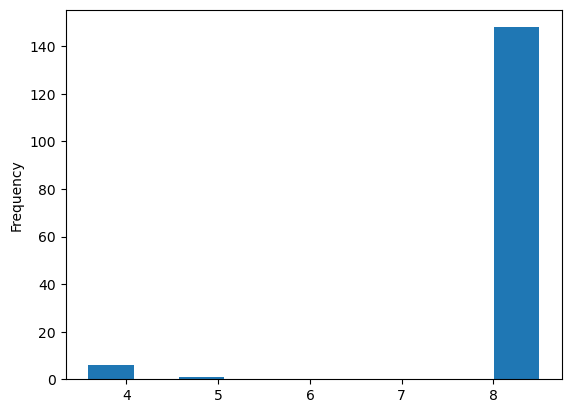

In [3]:
from src.handle_double_eclipses import remove_doubles
from src.noise_filtering import complete_filter

filtered = complete_filter(eclipses, "delta", return_diagnositics=False)
filtered['delta'].plot.hist()

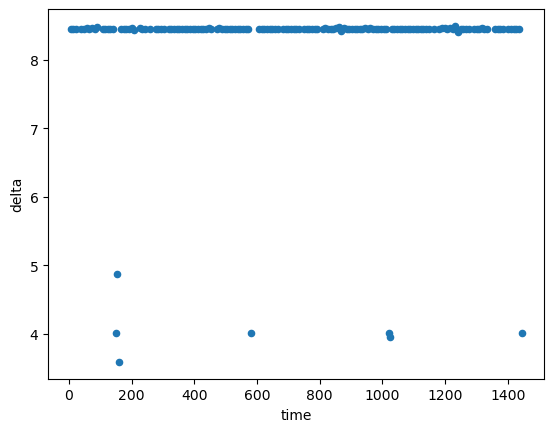

In [4]:
filtered.plot.scatter(y='delta', x='time')
plt.show()

In [5]:
period = getOC(filtered)
period

8.46045108373471

In [6]:
period = period * round(filtered["delta"].median() / period, 0)
period # this might break it, I hope not

8.46045108373471

In [7]:
max(align_data(filtered["time"], period / 2) % period)

8.240727486595688

In [12]:
from src.noise_filtering import remove_outliers

filtered["residuals"] = align_data(filtered["time"], period / 2) % period - period / 2
filtered = remove_outliers(filtered, "residuals", sigma=10)
filtered["residuals"]

5 eclipses dropped by outlier filter


0      0.000000
1     -0.000555
2     -0.001143
3     -0.002427
4     -0.003147
         ...   
150    0.003403
151    0.002747
152    0.002103
153    0.001532
154    0.000991
Name: residuals, Length: 150, dtype: float64

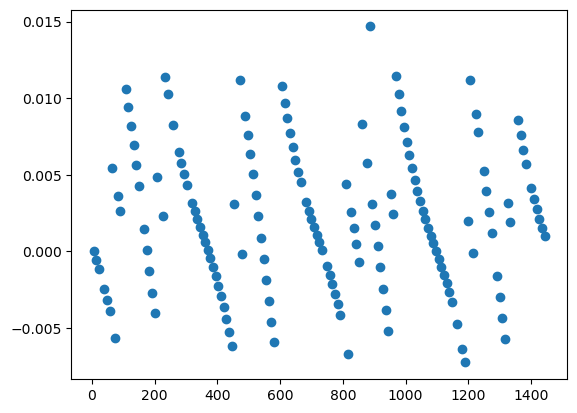

In [14]:
plt.scatter(x=filtered["time"], y=align_data(filtered["time"], period / 2) % period - period / 2)
plt.show()

In [49]:
N = 10000
k = - N // 2 + np.arange(N)
f_k = np.random.randn(N)

# non-equispaced fast Fourier transform
f = nfft.nfft(filtered["residuals"], f_k)